In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Now lets inspect our data 


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Replacing blanks with 0 as tenure is 0 and no total charges are recorded. also we have converted data type of total charges into float data type

In [66]:
#from above observation total charges column showing data type as object, but it should have integer. and also we observed in excel sheet some blank values, we have in that column.
# so first lets replace blank values with null, then we will convert into float

df['TotalCharges'] = df['TotalCharges'].replace(" ",0)
df['TotalCharges'] = df['TotalCharges'].astype("float")



In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
df.isnull().sum().sum()

np.int64(0)

In [69]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [70]:
df['customerID'].duplicated().sum()

np.int64(0)

In [71]:
def conv(value):
    if value == 0:
        return "No"
    else:
        return "Yes"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)




#### Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [73]:
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


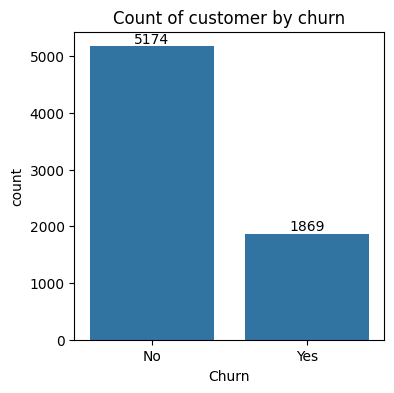

In [101]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'Churn', data= df)
plt.title("Count of customer by churn")
ax.bar_label(ax.containers[0])
plt.show()

In [85]:
gb = df.groupby('Churn').agg({'Churn':'count'})
gb

,Churn
Churn,
No,5174
Yes,1869


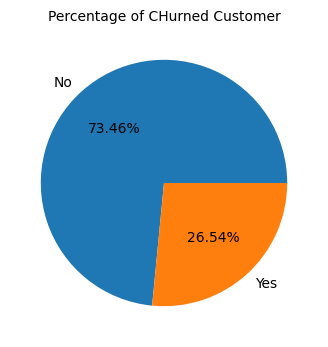

In [104]:
plt.figure(figsize=(4,4))
plt.pie(gb['Churn'],labels= gb.index,autopct="%1.2f%%")
plt.title("Percentage of CHurned Customer",fontsize = 10)
plt.show()

#### From the given pie chart we can conclude that 26.54% of our customers have churned out. 
#### Now lets explore the reason behind it

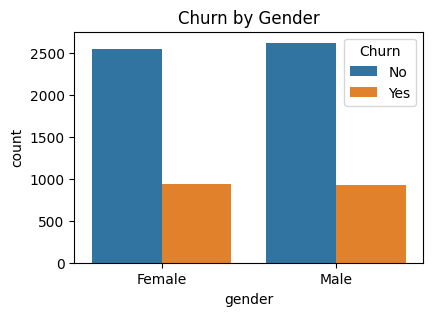

In [110]:
plt.figure(figsize=(4.5,3))
sns.countplot(x = 'gender', data = df,hue ='Churn')
plt.title("Churn by Gender")
plt.show()

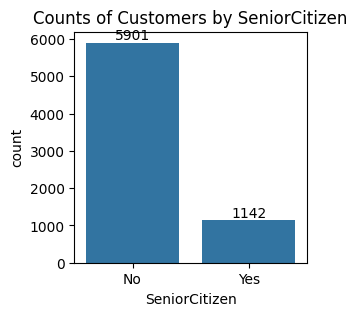

In [125]:
plt.figure(figsize=(3,3))
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title("Counts of Customers by SeniorCitizen")
plt.show()

Churn                 No        Yes
SeniorCitizen                      
No             76.393832  23.606168
Yes            58.318739  41.681261


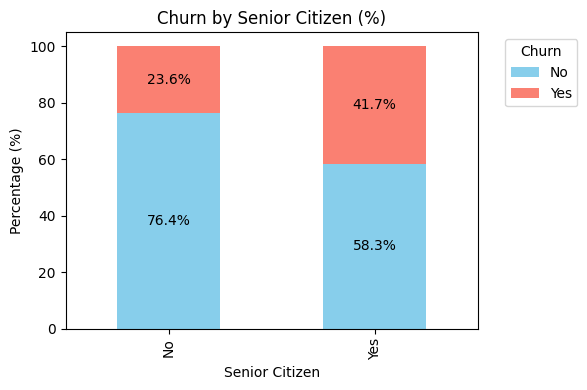

In [128]:
# Compute the percentage of Churn for each SeniorCitizen category
crosstab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
print(crosstab)

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4))
crosstab.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'])

# Add labels (percentages) to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title("Churn by Senior Citizen (%)")
plt.ylabel("Percentage (%)")
plt.xlabel("Senior Citizen")
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Comparatively a greater percentage of people in senior citzen category have churned.

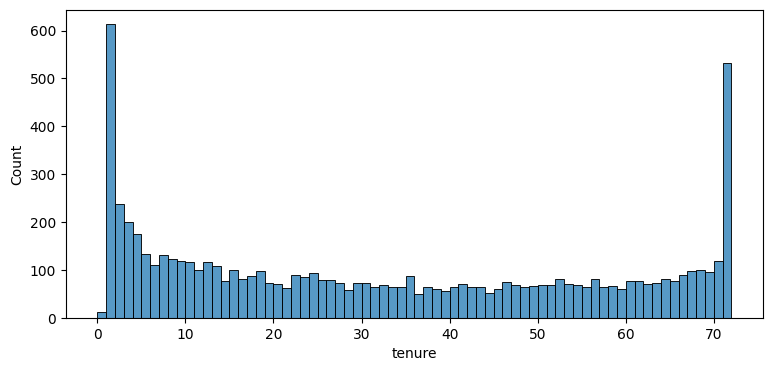

In [139]:

plt.figure(figsize=(9,4))
sns.histplot(x = 'tenure',data = df,bins=72)
plt.show() 

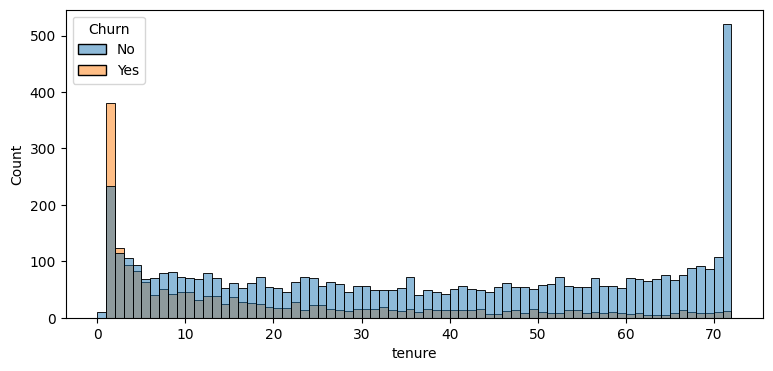

In [138]:

plt.figure(figsize=(9,4))
sns.histplot(x = 'tenure',data = df,bins=72,hue='Churn')
plt.show()

##### People who have used our services for long time have stayed and people who have used our services 1 or 2 months have churned

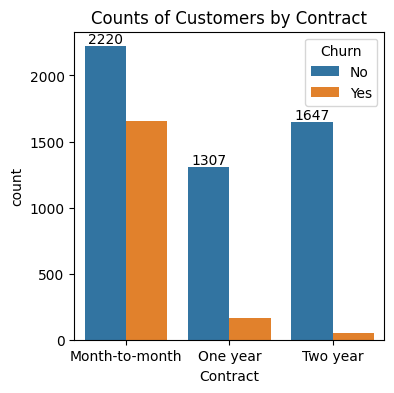

In [143]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'Contract', data = df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Counts of Customers by Contract")
plt.show()

#### People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [147]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

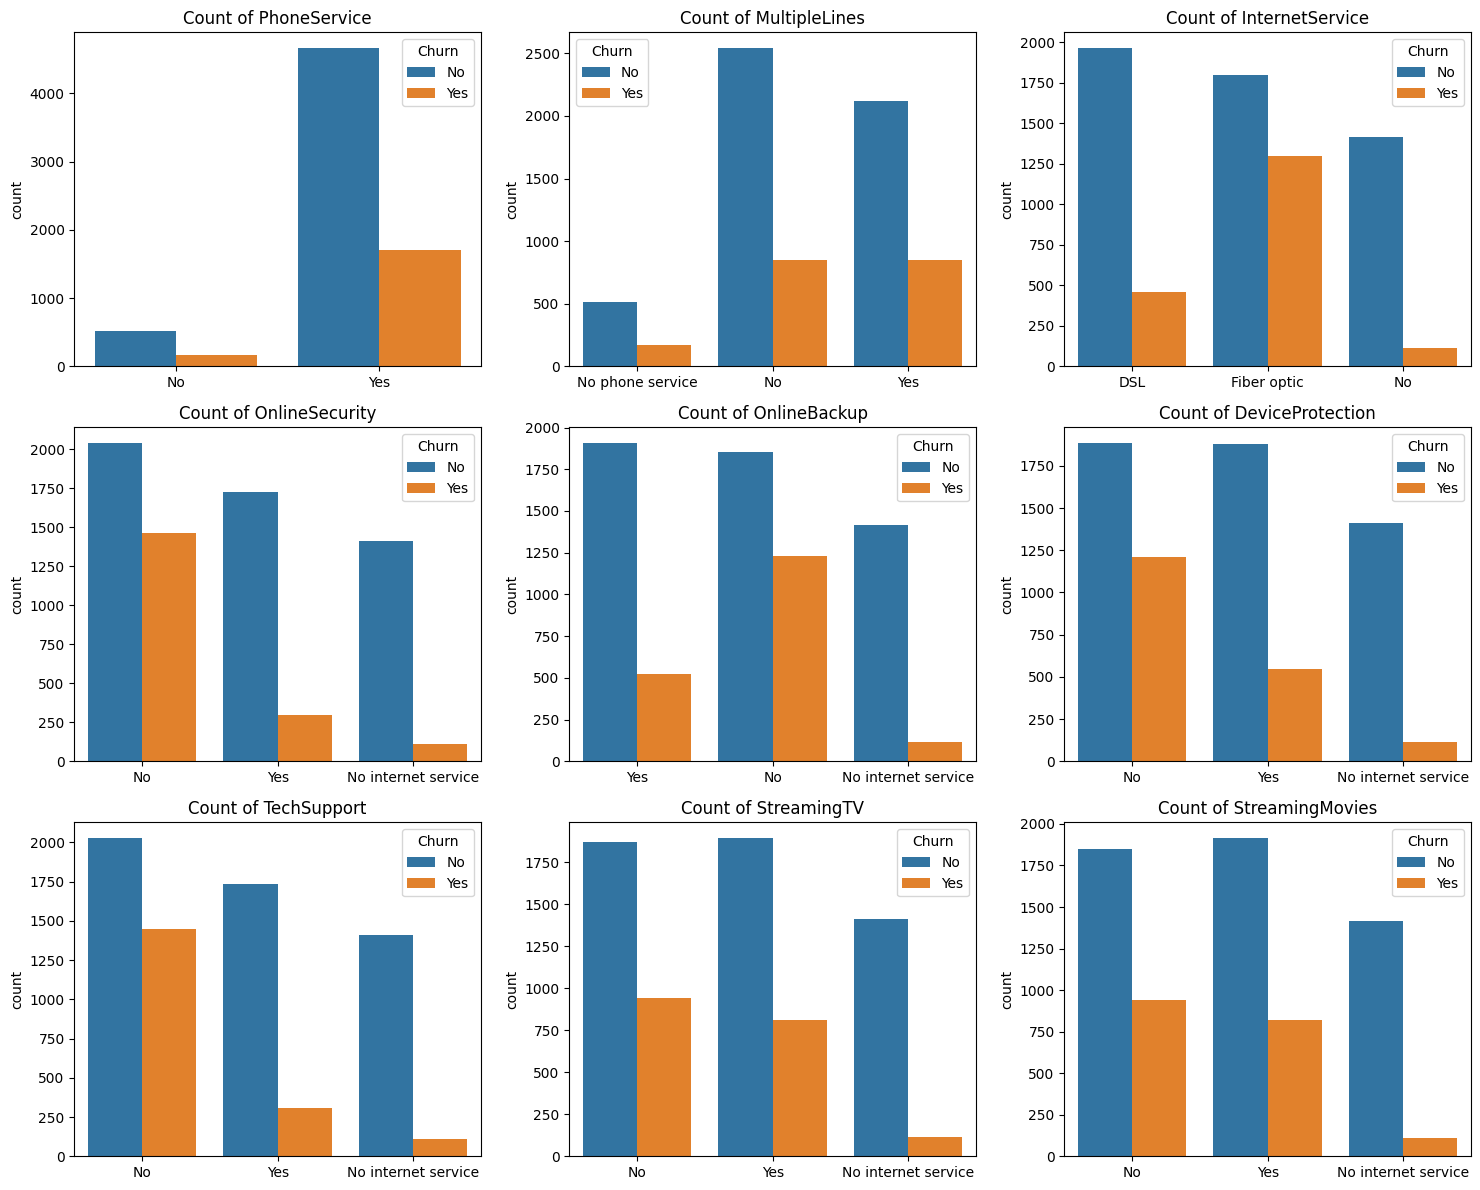

In [149]:
# List of columns
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 
           'StreamingTV', 'StreamingMovies']

# Set up the figure and subplots (3 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a countplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i],hue = df['Churn'])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('')  # Optional: to remove the x-axis label

# Adjust the layout
plt.tight_layout()
plt.show()


The visualizations depict count plots for various customer service features, with the churn status (Yes/No) as the hue. Across most categories, customers who have churned are generally fewer compared to those who have not. For services like phone, internet, and streaming, churn is higher among customers with certain features (e.g., fiber optic internet or no internet service). Features like online security, backup, and tech support show a noticeable difference, with more churn among customers who do not have these services.

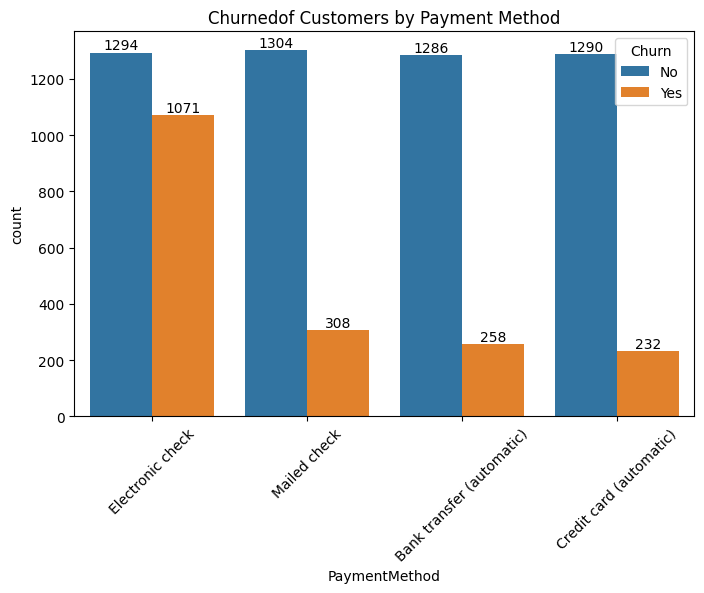

In [155]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'PaymentMethod', data = df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title("Churnedof Customers by Payment Method")
plt.show()

Customer is likely to churn when he is using electronic check as a payment method